# 1. EDA of Instances Data Set

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max_columns", None)

In [3]:
df_Instances = pd.read_csv("/content/df_I_cleaned.csv", sep=',', on_bad_lines='warn')
df_Instances.head()

,InstanceId,ApplicationCd,WfDefinitionId,WfDefinitionCd,StatusCd,InstanceSourceId,InstanceSourceCd,Priority,ProcessSlotId,StartTime,MasterId,EndTime,EntityStatusCd,Description,RelatedStepId,CreateUserTime,UpdateUserTime,groupname,division,team1,unit,startgroupname,LastStepId
0,10003850078,IctProblem,4095,ICT_Problem,CNC,10004,DynamicService,1,643,2021-03-19 23:26:02.260,0,2021-03-24 10:05:52.409,CANCEL,ICT Problem Yönetimi,0,2021-03-19 23:26:10.807,2021-03-24 10:05:52.409,EE-RHB-HRH-RHC,RBINCHB HCBIRECHER & BHNBIEREHB,RBINCHB HCBIRECHER CIHHBRR RRERBBRBEE,HJREHRBI RBINCHB HCBIRECHER,EE-RHB-HRH-RHC,1.000012e+12
1,10003045706,IctProblem,4095,ICT_Problem,CMP,10006,DynamicService,1,401,2021-02-25 16:02:58.628,0,2021-03-11 09:08:16.600,CANCEL,ICT Problem Yönetimi,0,2021-02-25 16:02:59.144,2021-03-11 09:08:17.694,EE-RHB-HRH-RHC,RBINCHB HCBIRECHER & BHNBIEREHB,RBINCHB HCBIRECHER CIHHBRR RRERBBRBEE,HJREHRBI RBINCHB HCBIRECHER,EE-RHB-HRH-RHC,1.000011e+12
2,10002677992,IctProblem,4087,ICT_Problem,CMP,10006,DynamicService,1,86,2021-02-15 21:11:11.857,0,2021-02-25 18:39:42.533,CANCEL,ICT Problem Yönetimi,0,2021-02-15 21:11:12.385,2021-02-15 21:11:21.808,EE-RHB-HRH-RHC,RBINCHB HCBIRECHER & BHNBIEREHB,RBINCHB HCBIRECHER CIHHBRR RRERBBRBEE,HJREHRBI RBINCHB HCBIRECHER,EE-RHB-HRH-RHC,1.000008e+12
3,10005932762,IctProblem,4110,ICT_Problem,CMP,10001,DynamicService,1,371,2021-05-17 21:58:06.871,0,2021-05-18 01:13:38.387,CANCEL,ICT Problem Yönetimi,0,2021-05-17 21:58:07.199,2021-05-18 01:13:40.309,EE-RHB-RHH-CHE,RBINCHB HCBIRECHER & BHNBIEREHB,CHE HCBIRECHER,RBINCHB HCBIRECHER HBEEBI,EE-RHB-RHH-CHE,1.000018e+12
4,10005828208,IctProblem,4110,ICT_Problem,CNC,10001,DynamicService,1,593,2021-05-14 00:20:52.924,0,2021-05-17 04:00:34.401,CANCEL,ICT Problem Yönetimi,0,2021-05-14 00:20:53.128,2021-05-17 04:00:34.401,EE-RHB-RHH-CHE,RBINCHB HCBIRECHER & BHNBIEREHB,CHE HCBIRECHER,RBINCHB HCBIRECHER HBEEBI,EE-RHB-RHH-CHE,1.000018e+12


In [4]:
df_Instances.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34249 entries, 0 to 34248
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   InstanceId        34249 non-null  int64  
 1   ApplicationCd     34249 non-null  object 
 2   WfDefinitionId    34249 non-null  int64  
 3   WfDefinitionCd    34249 non-null  object 
 4   StatusCd          34249 non-null  object 
 5   InstanceSourceId  34249 non-null  int64  
 6   InstanceSourceCd  26969 non-null  object 
 7   Priority          34249 non-null  int64  
 8   ProcessSlotId     34249 non-null  int64  
 9   StartTime         34249 non-null  object 
 10  MasterId          34249 non-null  int64  
 11  EndTime           32803 non-null  object 
 12  EntityStatusCd    34249 non-null  object 
 13  Description       34249 non-null  object 
 14  RelatedStepId     34249 non-null  int64  
 15  CreateUserTime    34249 non-null  object 
 16  UpdateUserTime    34249 non-null  object

## Let's correct the data types:
- change the columns 'StartTime', 'EndTime', 'CreateUserTime' and 'UpdateUserTime' to datetime format
- change the columns 'WfDefinitionId', 'InstanceSourceId', 'ProcessSlotId', 'MasterId', 'LastStepId' to categorical variable format

In [5]:
time_columns = ['StartTime', 'EndTime', 'CreateUserTime', 'UpdateUserTime']
for col in time_columns:
    df_Instances[col] = pd.to_datetime(df_Instances[col], errors='coerce')

cat_columns = ['WfDefinitionId', 'InstanceSourceId', 'ProcessSlotId', 'MasterId', 'LastStepId']
for col in cat_columns:
    df_Instances[col] = df_Instances[col].astype('category')
df_Instances.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34249 entries, 0 to 34248
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   InstanceId        34249 non-null  int64         
 1   ApplicationCd     34249 non-null  object        
 2   WfDefinitionId    34249 non-null  category      
 3   WfDefinitionCd    34249 non-null  object        
 4   StatusCd          34249 non-null  object        
 5   InstanceSourceId  34249 non-null  category      
 6   InstanceSourceCd  26969 non-null  object        
 7   Priority          34249 non-null  int64         
 8   ProcessSlotId     34249 non-null  category      
 9   StartTime         34249 non-null  datetime64[ns]
 10  MasterId          34249 non-null  category      
 11  EndTime           32803 non-null  datetime64[ns]
 12  EntityStatusCd    34249 non-null  object        
 13  Description       34249 non-null  object        
 14  RelatedStepId     3424

In [6]:
print('Summary for Categorical Variables:')
for column in df_Instances.select_dtypes(include=['object', 'category']).columns:
    print(f"\nValue counts for column: {column}")
    display(df_Instances[column].value_counts())


Summary for Categorical Variables:

Value counts for column: ApplicationCd


,count
ApplicationCd,
IctProblem,34249



Value counts for column: WfDefinitionId


,count
WfDefinitionId,
4087,14001
4110,6205
4155,3713
4095,3614
4201,2414
4205,2381
4228,1493
4224,299
4200,128



Value counts for column: WfDefinitionCd


,count
WfDefinitionCd,
ICT_Problem,34249



Value counts for column: StatusCd


,count
StatusCd,
CMP,29547
CNC,3256
W,1446



Value counts for column: InstanceSourceId


,count
InstanceSourceId,
10006,17459
0,7280
10004,3737
10001,3396
10000,1054
10018,996
10055,141
10069,118
10043,68



Value counts for column: InstanceSourceCd


,count
InstanceSourceCd,
DynamicService,26969



Value counts for column: ProcessSlotId


,count
ProcessSlotId,
363,59
568,55
418,55
205,53
322,51
...,...
162,20
82,20
979,19



Value counts for column: MasterId


,count
MasterId,
0,34249



Value counts for column: EntityStatusCd


,count
EntityStatusCd,
CLOSE,16961
CANCEL,11787
REJECT,4055
OPEN,912
REOPEN,95
SOLUTION,89
SLNWAITINGAPPROVAL,85
DEPLOYMENTWAITING,51
DATACONFIRM,45



Value counts for column: Description


,count
Description,
ICT Problem Yönetimi,34249



Value counts for column: groupname


,count
groupname,
EE-RHB-HRH-RHC,21919
EE-RHB-RHH-CHE,2654
CHE-RH-RRH-CH,1378
CHE-RH-RRH-BR,1151
LI-I-IH,996
...,...
CHE-CH-HRRR-RA,1
EE-HEH-HEH,1
CHE-CH-RARI-RRRRRAR,1



Value counts for column: division


,count
division,
RBINCHB HCBIRECHER & BHNBIEREHB,25082
RCCLCHRECHE HCBIRECHER,6348
IBBJLRECHE,996
CENIRREIJHEJIB HCBIRECHER,927
HJREHRBI & HFREEBL RHLJECHER,337
EBHFEHLHBC,137
AJRCEBRR RRERBBRBEE,75
HHIB EBEFHIK HCBIRECHER,70
HCABI RBHJICEC,56



Value counts for column: team1


,count
team1,
RBINCHB HCBIRECHER CIHHBRR RRERBBRBEE,21922
CHE HCBIRECHER,2654
CIHHBRR & HHENCBJIRECHE RRERBBRBEE,1378
IBBJLREHIC HHRCLCREHB RRERBBRBEE,996
HNNCHB CENHIRRECHE RBINCHBR,908
...,...
REHIRBB&ARHKJC RRERBBRBEE,1
HHIB EBEFHIK HCECRCRRECHE,1
RBINCHB/RRR RAR,1



Value counts for column: unit


,count
unit,
HJREHRBI RBINCHB HCBIRECHER,21929
RRERBBRBEE RCREBR HCBIRECHER,3219
RBINCHB HCBIRECHER HBEEBI,3147
HJREHRBI & HFREEBLR HCBIRECHER,1824
IBBJLREHIC HHRCLCREHB RRERBBRBEE,996
...,...
RHHBRR EBEFHIK KRIRRBECR,1
HHIB EBEFHIK HCECRCRRECHE,1
RRERARRB&RCRRREBI IBHHNBIC RRERBBRBEE,1



Value counts for column: startgroupname


,count
startgroupname,
EE-RHB-HRH-RHC,21919
EE-RHB-RHH-CHE,2654
CHE-RH-RRH-CH,1378
CHE-RH-RRH-BR,1151
LI-I-IH,996
...,...
CHE-CH-HRRR-RA,1
EE-HEH-HEH,1
CHE-CH-RARI-RRRRRAR,1



Value counts for column: LastStepId


,count
LastStepId,
1.000037e+12,1
1.850044e+08,1
1.850325e+08,1
1.850531e+08,1
1.850686e+08,1
...,...
1.852457e+08,1
1.852071e+08,1
1.851880e+08,1


## Drop the Unnecessary Columns
- We see that we have single categories for 'ApplicationCd', 'WfDefinitionCd', 'InstanceSourceCd', ''MasterId'', and 'Decscription' columns. Since they do not give us any information that we can use while forecasting the time required for an instance, let's drop them.
- LastStepId also does not give any valuable information and it is unique for each instance, so let's also drop it.

In [7]:
columns_to_drop = ['ApplicationCd', 'WfDefinitionCd', 'InstanceSourceCd', 'MasterId', 'Description', 'LastStepId']
df_Instances = df_Instances.drop(columns=columns_to_drop)
df_Instances.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34249 entries, 0 to 34248
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   InstanceId        34249 non-null  int64         
 1   WfDefinitionId    34249 non-null  category      
 2   StatusCd          34249 non-null  object        
 3   InstanceSourceId  34249 non-null  category      
 4   Priority          34249 non-null  int64         
 5   ProcessSlotId     34249 non-null  category      
 6   StartTime         34249 non-null  datetime64[ns]
 7   EndTime           32803 non-null  datetime64[ns]
 8   EntityStatusCd    34249 non-null  object        
 9   RelatedStepId     34249 non-null  int64         
 10  CreateUserTime    34249 non-null  datetime64[ns]
 11  UpdateUserTime    34249 non-null  datetime64[ns]
 12  groupname         34249 non-null  object        
 13  division          34249 non-null  object        
 14  team1             3424

## Analysis of Categorical Variables
### WfDefinitionID:
- As we have seen from the above tables, the highest number of instances are in the workflow that has the Id of 4087.
- It is followed by 4110, 4155, and 4095
- I'm interested in the percentages of instances for each category. So let's create a percentage table:

In [8]:
wf_definition_id_percentages = df_Instances['WfDefinitionId'].value_counts(normalize=True) * 100
print('Percentage of Instances by WfDefinitionId:')
print(wf_definition_id_percentages.to_string(header=False))

Percentage of Instances by WfDefinitionId:
4087    40.880026
4110    18.117317
4155    10.841192
4095    10.552133
4201     7.048381
4205     6.952028
4228     4.359251
4224     0.873018
4200     0.373734
4197     0.002920


- Let's create a bar plot and make sure that we represent percentages on the bars.

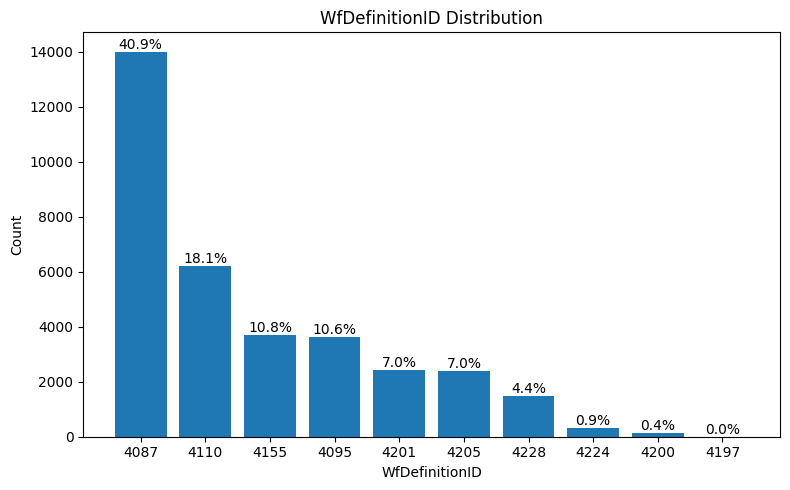

In [9]:
# Get counts per category
counts = df_Instances['WfDefinitionId'].value_counts()

# Create bar plot
plt.figure(figsize=(8, 5))
bars = plt.bar(counts.index.astype(str), counts.values)

# Add percentages on top of each bar
for bar, pct in zip(bars, wf_definition_id_percentages):
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height,
        f'{pct:.1f}%',
        ha='center',
        va='bottom'
    )

# Labels
plt.xlabel('WfDefinitionID')
plt.ylabel('Count')
plt.title('WfDefinitionID Distribution')

plt.tight_layout()
plt.show()

### StatusCd:
- As we have seen from the above tables, most of the instances are in the category of CMP, followed by CNC.
- I'm interested in the percentages of instances for each category. So let's create a bar chart with percentages.

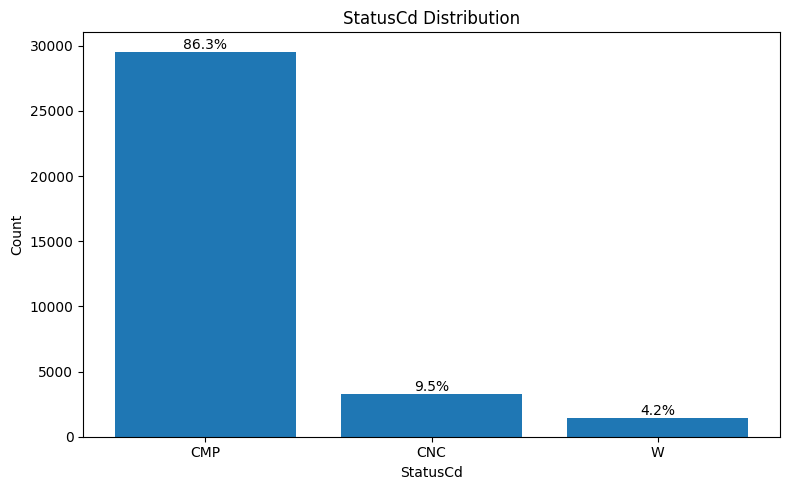

In [10]:
StatusCd_percentages = df_Instances['StatusCd'].value_counts(normalize=True) * 100
#print('Percentage of Instances by StatusCd:')
#print(StatusCd_percentages.to_string(header=False))

counts = df_Instances['StatusCd'].value_counts()

plt.figure(figsize=(8, 5))
bars = plt.bar(counts.index.astype(str), counts.values)

for bar, pct in zip(bars, StatusCd_percentages):
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height,
        f'{pct:.1f}%',
        ha='center',
        va='bottom'
    )

plt.xlabel('StatusCd')
plt.ylabel('Count')
plt.title('StatusCd Distribution')

plt.tight_layout()
plt.show()

### InstanceSourceId:
- I'm interested in the sources that open most number of tickets.
- Let's create a bar chart with percentages.

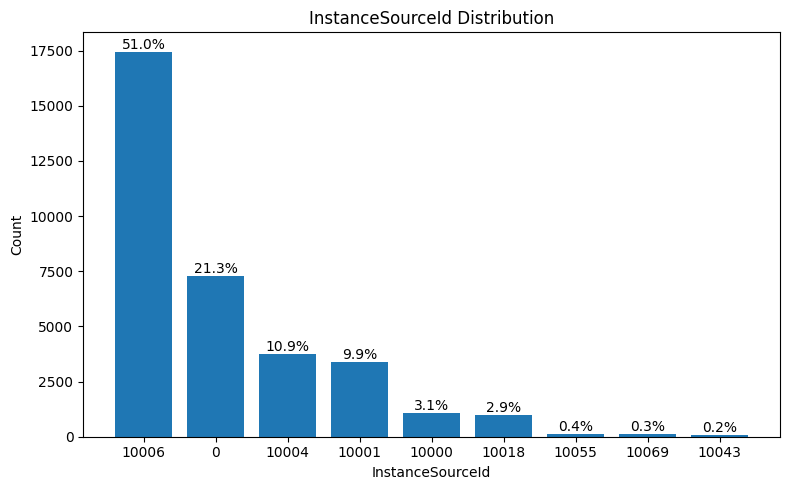

In [ ]:
InstanceSourceId_percentages = df_Instances['InstanceSourceId'].value_counts(normalize=True) * 100

counts = df_Instances['InstanceSourceId'].value_counts()

plt.figure(figsize=(8, 5))
bars = plt.bar(counts.index.astype(str), counts.values)

for bar, pct in zip(bars, InstanceSourceId_percentages):
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height,
        f'{pct:.1f}%',
        ha='center',
        va='bottom'
    )

plt.xlabel('InstanceSourceId')
plt.ylabel('Count')
plt.title('InstanceSourceId Distribution')

plt.tight_layout()
plt.show()

### ProcessSlotId:
- It has 1000 different categories.
- It is not meaningful to show it on a bar chart. Percentages are also very small for each category.
- Based on our interviews with the data owner, we decided to remove this feature from the data set.

### EntityStatusCd:
- It has 17 different categories.
- These categories are different than the StatusCd of each instance. For CMP labeled StatusCd, we see some Cancel, Reject types for EntityStatusCd.
- Based on our interviews with the data owner, we decided that this feature is not relevant for our case.

### For the remaning features (group name, team name, unit name):
- Plotting is not going to give us more information.
- We keep these features as they are important for our forecasts.
- Let's create tables that include count and percentage values for each of these features

In [11]:
columns_to_drop_new = ['ProcessSlotId', 'EntityStatusCd']
df_Instances = df_Instances.drop(columns=columns_to_drop_new)
#df_Instances.info()

In [12]:
print('Summary for Some of the Categorical Variables:')
table_columns = ['groupname', 'division', 'team1', 'unit', 'startgroupname']

for column in table_columns:
    print(f"\nValue counts for column: {column}")

    counts = df_Instances[column].value_counts()
    percentages = df_Instances[column].value_counts(normalize=True) * 100

    summary_df = (
        pd.DataFrame({
            'Count': counts,
            'Percentage (%)': percentages
        })
        .round(2)
    )

    display(summary_df)


Summary for Some of the Categorical Variables:

Value counts for column: groupname


,Count,Percentage (%)
groupname,,
EE-RHB-HRH-RHC,21919,64.00
EE-RHB-RHH-CHE,2654,7.75
CHE-RH-RRH-CH,1378,4.02
CHE-RH-RRH-BR,1151,3.36
LI-I-IH,996,2.91
...,...,...
CHE-CH-HRRR-RA,1,0.00
EE-HEH-HEH,1,0.00
CHE-CH-RARI-RRRRRAR,1,0.00



Value counts for column: division


,Count,Percentage (%)
division,,
RBINCHB HCBIRECHER & BHNBIEREHB,25082,73.23
RCCLCHRECHE HCBIRECHER,6348,18.53
IBBJLRECHE,996,2.91
CENIRREIJHEJIB HCBIRECHER,927,2.71
HJREHRBI & HFREEBL RHLJECHER,337,0.98
EBHFEHLHBC,137,0.40
AJRCEBRR RRERBBRBEE,75,0.22
HHIB EBEFHIK HCBIRECHER,70,0.20
HCABI RBHJICEC,56,0.16



Value counts for column: team1


,Count,Percentage (%)
team1,,
RBINCHB HCBIRECHER CIHHBRR RRERBBRBEE,21922,64.01
CHE HCBIRECHER,2654,7.75
CIHHBRR & HHENCBJIRECHE RRERBBRBEE,1378,4.02
IBBJLREHIC HHRCLCREHB RRERBBRBEE,996,2.91
HNNCHB CENHIRRECHE RBINCHBR,908,2.65
...,...,...
REHIRBB&ARHKJC RRERBBRBEE,1,0.00
HHIB EBEFHIK HCECRCRRECHE,1,0.00
RBINCHB/RRR RAR,1,0.00



Value counts for column: unit


,Count,Percentage (%)
unit,,
HJREHRBI RBINCHB HCBIRECHER,21929,64.03
RRERBBRBEE RCREBR HCBIRECHER,3219,9.40
RBINCHB HCBIRECHER HBEEBI,3147,9.19
HJREHRBI & HFREEBLR HCBIRECHER,1824,5.33
IBBJLREHIC HHRCLCREHB RRERBBRBEE,996,2.91
...,...,...
RHHBRR EBEFHIK KRIRRBECR,1,0.00
HHIB EBEFHIK HCECRCRRECHE,1,0.00
RRERARRB&RCRRREBI IBHHNBIC RRERBBRBEE,1,0.00



Value counts for column: startgroupname


,Count,Percentage (%)
startgroupname,,
EE-RHB-HRH-RHC,21919,64.00
EE-RHB-RHH-CHE,2654,7.75
CHE-RH-RRH-CH,1378,4.02
CHE-RH-RRH-BR,1151,3.36
LI-I-IH,996,2.91
...,...,...
CHE-CH-HRRR-RA,1,0.00
EE-HEH-HEH,1,0.00
CHE-CH-RARI-RRRRRAR,1,0.00


## Analysis of Integer Columns

### InstanceID:
- This is actually not a numeric column. We will use this while merging the data frame with other data sets.

### Priority:
- This can also be treated as category, but I would like to keep it as int for now.

In [13]:
df_Instances['Priority'].value_counts()

,count
Priority,
1,34249


- Since there is only one group. Let's drop this column.

In [14]:
df_Instances = df_Instances.drop(columns=['Priority'])

### RelatedStepId:
- We will keep this column as it might be useful when merging this data set with other sets. However, we do not need to analyze this acolumn at this point.

## Analysis of DateTime columns
### First let's see if we have missing values

In [15]:
datetime_cols = ['StartTime', 'EndTime', 'CreateUserTime', 'UpdateUserTime']

summary = []

for col in datetime_cols:
    s = pd.to_datetime(df_Instances[col], errors='coerce')

    summary.append({
        'column': col,
        'missing_count': s.isna().sum(),
        'missing_%': s.isna().mean() * 100,
        'min_date': s.min(),
        'max_date': s.max(),
        'time_span_days': (s.max() - s.min()).days if s.notna().any() else None
    })

datetime_summary = pd.DataFrame(summary)
display(datetime_summary)

,column,missing_count,missing_%,min_date,max_date,time_span_days
0,StartTime,0,0.000000,2020-09-19 01:33:21.493,2021-09-18 23:37:28.994,364
1,EndTime,1446,4.222021,2020-09-21 10:23:39.157,2021-10-08 10:24:50.850,382
2,CreateUserTime,0,0.000000,2020-09-19 01:33:22.450,2021-09-18 23:37:29.637,364
3,UpdateUserTime,0,0.000000,2020-09-21 10:23:39.780,2021-10-15 15:49:15.816,389


- EndTime is missing for those instances that are still in the system (work in process). We can remove them eventually.
- I am wondering if StartTime is different than CreateUserTime. I'll check it by finding the difference between this columns.

In [16]:
df_Instances['Create-Start'] = (
    df_Instances['StartTime'] - df_Instances['CreateUserTime']
).dt.total_seconds() / 3600

In [17]:
df_Instances['Create-Start'].describe()

,Create-Start
count,34249.000000
mean,-0.000249
std,0.000360
min,-0.008151
25%,-0.000238
50%,-0.000174
75%,-0.000121
max,-0.000013


- As seen the difference is within micro seconds.
- So it is wise to keep only one of them. I decide to keep StartTime so drop CreateUserTime.
- Before that I'm interested in the difference between CreateUserTime and UpdateUserTime as weel as the difference between Update time and EndTime

In [18]:
df_Instances['Create-Update'] = (
    df_Instances['UpdateUserTime'] - df_Instances['CreateUserTime']
).dt.total_seconds() / 3600

In [19]:
df_Instances['Create-Update'].describe()

,Create-Update
count,34249.000000
mean,700.510119
std,980.831830
min,-0.000536
25%,121.890932
50%,321.893705
75%,815.223027
max,9139.042626


In [20]:
df_Instances['End-Update'] = (
    df_Instances['UpdateUserTime'] - df_Instances['EndTime']
).dt.total_seconds() / 3600

In [ ]:
df_Instances['End-Update'].describe()

,End-Update
count,32803.000000
mean,134.921716
std,628.199838
min,-2905.764617
25%,0.000165
50%,0.000235
75%,0.000375
max,6385.468728


- Since there are no EndTime for some of the instances, it is okay to have positive difference between Update and End times. When we check the percentiles, we realize that actually these two values are very close to each other (forget about the mean as it is highly affected by the large positive numbers comes because of EndTime).
- We can also drop the UpdateUserTime.
- In summary let's drop UpadateUserTime and CreateUserTime as Start and End times give us more information.

In [21]:
df_Instances = df_Instances.drop(columns=['UpdateUserTime', 'CreateUserTime'])

- At this point, it is wise to drop the rows where we have NA in the EndTime
- Also, let's dop the columns at which we calcualte the time differences above

In [22]:
df_Instances = df_Instances.dropna(subset=['EndTime'])
df_Instances = df_Instances.drop(columns=['Create-Start', 'Create-Update', 'End-Update'])
df_Instances.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32803 entries, 0 to 34198
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   InstanceId        32803 non-null  int64         
 1   WfDefinitionId    32803 non-null  category      
 2   StatusCd          32803 non-null  object        
 3   InstanceSourceId  32803 non-null  category      
 4   StartTime         32803 non-null  datetime64[ns]
 5   EndTime           32803 non-null  datetime64[ns]
 6   RelatedStepId     32803 non-null  int64         
 7   groupname         32803 non-null  object        
 8   division          32803 non-null  object        
 9   team1             32803 non-null  object        
 10  unit              32803 non-null  object        
 11  startgroupname    32803 non-null  object        
dtypes: category(2), datetime64[ns](2), int64(2), object(6)
memory usage: 2.8+ MB


- Let's check how many years are covered in the data set

In [23]:
datetime_cols = ['StartTime', 'EndTime']
counts_by_year_df = pd.DataFrame({

    col: df_Instances[col].dt.year.value_counts().sort_index()
    for col in datetime_cols
})

counts_by_year_df = counts_by_year_df.fillna(0).astype(int)

counts_by_year_df['OpenJobs'] = (
    counts_by_year_df['StartTime'].cumsum()
    - counts_by_year_df['EndTime'].cumsum()
)

display(counts_by_year_df)




,StartTime,EndTime,OpenJobs
2020,10180,7969,2211
2021,22623,24834,0


- Let's calculate the number of open jobs based on the month of the year.

In [24]:
counts_by_month_df = pd.DataFrame({
    col: df_Instances[col].dt.to_period('M').value_counts().sort_index()
    for col in datetime_cols
})

counts_by_month_df = counts_by_month_df.fillna(0).astype(int)

counts_by_month_df['OpenJobs'] = (
    counts_by_month_df['StartTime'].cumsum()
    - counts_by_month_df['EndTime'].cumsum()
)

display(counts_by_month_df)


,StartTime,EndTime,OpenJobs
2020-09,1187,431,756
2020-10,2817,636,2937
2020-11,3069,3833,2173
2020-12,3107,3069,2211
2021-01,2826,2800,2237
2021-02,2953,3027,2163
2021-03,3246,3759,1650
2021-04,2716,2695,1671
2021-05,2122,2260,1533
2021-06,2994,2871,1656


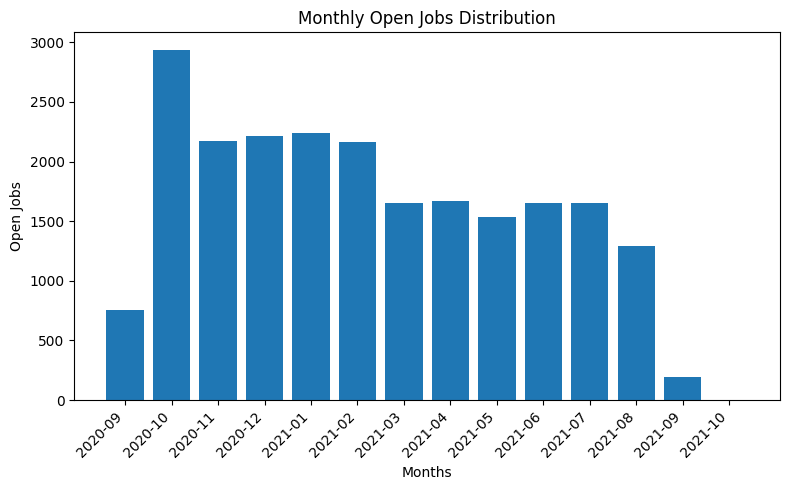

In [25]:
plt.figure(figsize=(8, 5))
bars = plt.bar(counts_by_month_df.index.astype(str), counts_by_month_df['OpenJobs'].values)

plt.xlabel('Months')
plt.ylabel('Open Jobs')
plt.title('Monthly Open Jobs Distribution')

plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

- Let's analyze the number of open jobs based on the week of the year.

In [26]:

counts_by_week_df = pd.DataFrame({
    col: df_Instances[col].dt.to_period('W').value_counts().sort_index()
    for col in datetime_cols
})

counts_by_week_df = counts_by_week_df.fillna(0).astype(int)

counts_by_week_df['OpenJobs'] = (
    counts_by_week_df['StartTime'].cumsum()
    - counts_by_week_df['EndTime'].cumsum()
)

display(counts_by_week_df)

,StartTime,EndTime,OpenJobs
2020-09-14/2020-09-20,94,0,94
2020-09-21/2020-09-27,782,116,760
2020-09-28/2020-10-04,711,365,1106
2020-10-05/2020-10-11,708,147,1667
2020-10-12/2020-10-18,670,126,2211
2020-10-19/2020-10-25,634,197,2648
2020-10-26/2020-11-01,433,122,2959
2020-11-02/2020-11-08,732,1652,2039
2020-11-09/2020-11-15,696,683,2052
2020-11-16/2020-11-22,673,476,2249


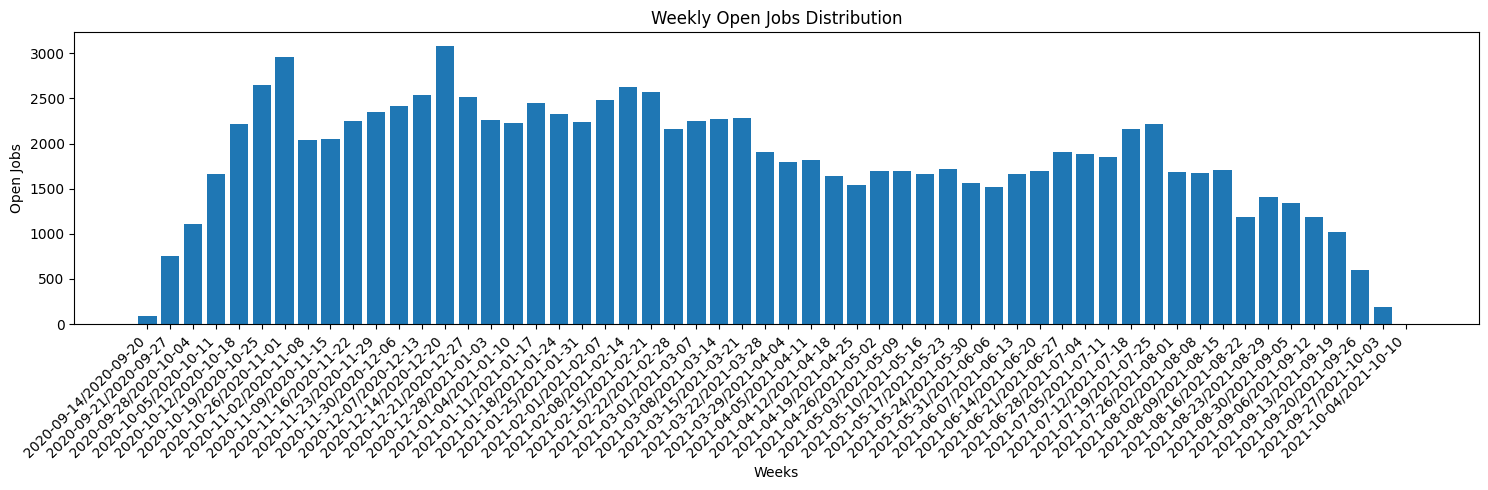

In [27]:
plt.figure(figsize=(15, 5))
bars = plt.bar(counts_by_week_df.index.astype(str), counts_by_week_df['OpenJobs'].values)

plt.xlabel('Weeks')
plt.ylabel('Open Jobs')
plt.title('Weekly Open Jobs Distribution')

plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

## Adding New Features
- Let's start by adding month and week information for each row.
- Since it spans a year, we do not need to add year information

In [28]:
df_Instances['Start_Month'] = df_Instances['StartTime'].dt.month
df_Instances['Start_Week'] = df_Instances['StartTime'].dt.isocalendar().week

df_Instances['End_Month'] = df_Instances['EndTime'].dt.month
df_Instances['End_Week'] = df_Instances['EndTime'].dt.isocalendar().week

- Finally, let's calculate the duration of each job/ticket as it is going to be our target variable.
- Make sure that it is calcualted in hours.

In [29]:
df_Instances['Duration'] = (df_Instances['EndTime'] - df_Instances['StartTime']).dt.total_seconds() / 3600

In [30]:
df_Instances.head()

,InstanceId,WfDefinitionId,StatusCd,InstanceSourceId,StartTime,EndTime,RelatedStepId,groupname,division,team1,unit,startgroupname,Start_Month,Start_Week,End_Month,End_Week,Duration
0,10003850078,4095,CNC,10004,2021-03-19 23:26:02.260,2021-03-24 10:05:52.409,0,EE-RHB-HRH-RHC,RBINCHB HCBIRECHER & BHNBIEREHB,RBINCHB HCBIRECHER CIHHBRR RRERBBRBEE,HJREHRBI RBINCHB HCBIRECHER,EE-RHB-HRH-RHC,3,11,3,12,106.663930
1,10003045706,4095,CMP,10006,2021-02-25 16:02:58.628,2021-03-11 09:08:16.600,0,EE-RHB-HRH-RHC,RBINCHB HCBIRECHER & BHNBIEREHB,RBINCHB HCBIRECHER CIHHBRR RRERBBRBEE,HJREHRBI RBINCHB HCBIRECHER,EE-RHB-HRH-RHC,2,8,3,10,329.088326
2,10002677992,4087,CMP,10006,2021-02-15 21:11:11.857,2021-02-25 18:39:42.533,0,EE-RHB-HRH-RHC,RBINCHB HCBIRECHER & BHNBIEREHB,RBINCHB HCBIRECHER CIHHBRR RRERBBRBEE,HJREHRBI RBINCHB HCBIRECHER,EE-RHB-HRH-RHC,2,7,2,8,237.475188
3,10005932762,4110,CMP,10001,2021-05-17 21:58:06.871,2021-05-18 01:13:38.387,0,EE-RHB-RHH-CHE,RBINCHB HCBIRECHER & BHNBIEREHB,CHE HCBIRECHER,RBINCHB HCBIRECHER HBEEBI,EE-RHB-RHH-CHE,5,20,5,20,3.258754
4,10005828208,4110,CNC,10001,2021-05-14 00:20:52.924,2021-05-17 04:00:34.401,0,EE-RHB-RHH-CHE,RBINCHB HCBIRECHER & BHNBIEREHB,CHE HCBIRECHER,RBINCHB HCBIRECHER HBEEBI,EE-RHB-RHH-CHE,5,19,5,20,75.661521


- Let's export the data set to a csv file so that we can starting working on our ML models next.

In [31]:
df_Instances.to_csv('/content/df_Ins_ML.csv', index=False)